In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:


sf_df = pd.read_parquet("safety-SanFrancisco-1.parquet")
ny_df = pd.read_parquet("safety-Nyc-1.parquet",)

In [15]:
sf_df.sort_values('dateTime')

,requestId,dataSubtype,dateTime,category,subcategory,status,address,latitude,longitude,source
2676030,491742,911_Fire,2016-01-01 00:00:43,Potentially Life-Threatening,Medical Incident,None,600 Block of LAGUNA ST,37.776688,-122.426379,NaN
3611753,358556,911_Fire,2016-01-01 00:00:43,Potentially Life-Threatening,Medical Incident,None,600 Block of LAGUNA ST,37.776688,-122.426379,NaN
1924513,1069916,911_Fire,2016-01-01 00:02:57,Fire,Outside Fire,None,PRECITA AV/FLORIDA ST,37.747553,-122.409572,NaN
2272976,714263,911_Fire,2016-01-01 00:03:02,Alarm,Alarms,None,1600 Block of EUCALYPTUS DR,37.731150,-122.488371,NaN
3052248,204288,911_Fire,2016-01-01 00:03:02,Alarm,Alarms,None,1600 Block of EUCALYPTUS DR,37.731150,-122.488371,NaN
...,...,...,...,...,...,...,...,...,...,...
381292,925886,911_Fire,2020-07-15 23:46:46,Non Life-threatening,Medical Incident,None,200 Block of WOODSIDE AVE,37.745956,-122.454240,NaN
644976,365496,911_Fire,2020-07-15 23:49:54,Non Life-threatening,Medical Incident,None,1000 Block of LE CONTE AVE,37.719033,-122.398004,NaN
1329049,826123,911_Fire,2020-07-15 23:51:08,Potentially Life-Threatening,Medical Incident,None,1500 Block of GREEN ST,37.797458,-122.424604,NaN
797506,735510,911_Fire,2020-07-15 23:51:08,Potentially Life-Threatening,Medical Incident,None,1500 Block of GREEN ST,37.797458,-122.424604,NaN


### EDA plan

<ol>
    <li><p>Five most frequent events aggregation on time scale.</p></li>    
    <li><p>Show most frequent events locations.</p></li>
</ol>

### 1. Events aggregation on time scale.

San Francisco safety events aggregation by year and month.

In [4]:
five_frequent = sf_df['category'].value_counts().index[:5].to_list()
top_five_df = sf_df.loc[sf_df['category'].isin(five_frequent)]
top_five_df['category'].cat.remove_unused_categories(inplace=True)

/Users/wojciechstasiuk/Documents/git_projects/manning_urban/urban/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [5]:
yearmonth_groupby = top_five_df.groupby(by=[top_five_df['dateTime'].dt.year,
                                       top_five_df['dateTime'].dt.month,
                                       top_five_df['category']
                                      ],
                                  ).count()['requestId']
yearmonth_groupby.index.set_names(['year', 'month', 'event'],
                                  inplace=True)
yearmonth_groupby = yearmonth_groupby.reset_index()

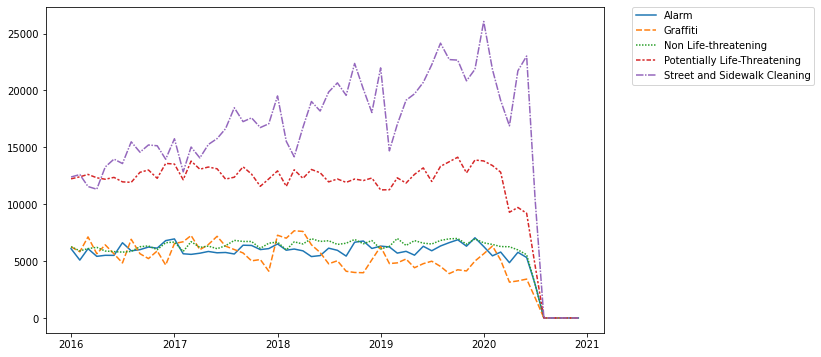

In [6]:
yearmonth_pivot = yearmonth_groupby.pivot(index=['year','month'],columns=['event'],values='requestId')
yearmonth_pivot.reset_index(inplace=True)
yearmonth_pivot.set_index(pd.to_datetime(yearmonth_pivot[['year','month']].assign(day=1)),
                          inplace=True)
yearmonth_pivot.drop(['year','month'],
                     axis=1,
                     inplace=True)

plt.figure(figsize=(10,6))
sns.lineplot(data=yearmonth_pivot)
plt.legend(bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.)

In [7]:
dayofweek_groupby = top_five_df.groupby(by=[top_five_df['dateTime'].dt.dayofweek,
                                       top_five_df['category']
                                      ],
                                  ).count()['requestId']
dayofweek_groupby.index.set_names(['day', 'event'],
                                  inplace=True)
dayofweek_groupby = dayofweek_groupby.reset_index()

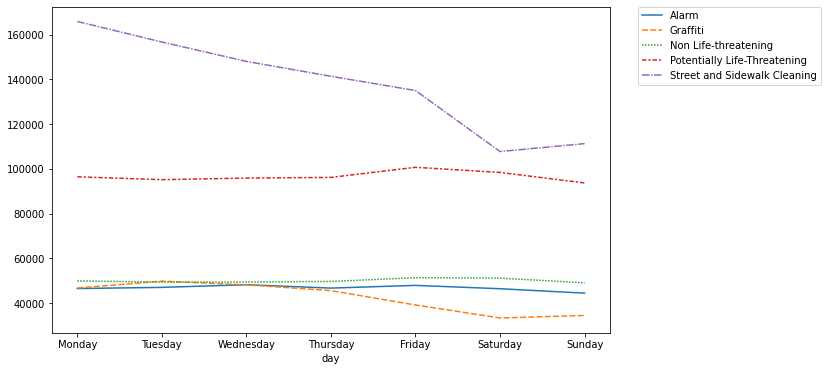

In [8]:
dayofweek_pivot = dayofweek_groupby.pivot(index='day',columns='event',values='requestId')
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
dayofweek_pivot= dayofweek_pivot.rename(index=day_map)
plt.figure(figsize=(10,6))
sns.lineplot(data=dayofweek_pivot)
plt.legend(bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.)

In [9]:
hour_groupby = top_five_df.groupby(by=[top_five_df['dateTime'].dt.hour,
                                       top_five_df['category']
                                      ],
                                  ).count()['requestId']
hour_groupby.index.set_names(['hour', 'event'],
                                  inplace=True)
hour_groupby = hour_groupby.reset_index()

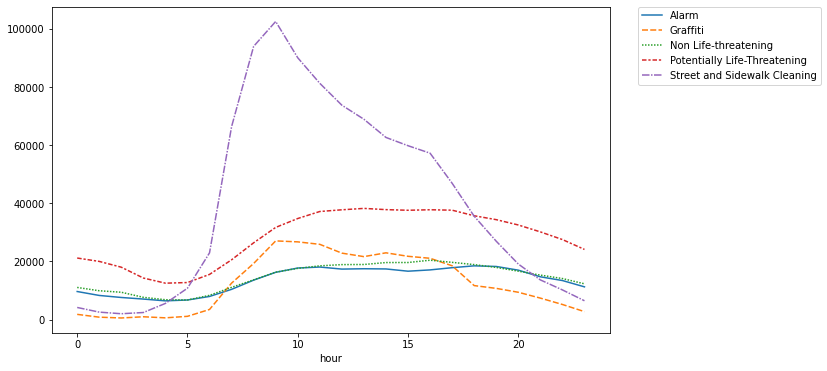

In [10]:
hour_pivot = hour_groupby.pivot(index='hour',columns='event',values='requestId')

plt.figure(figsize=(10,6))
sns.lineplot(data=hour_pivot)
plt.legend(bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.)

Street and Sidewalk Cleaning
status
source


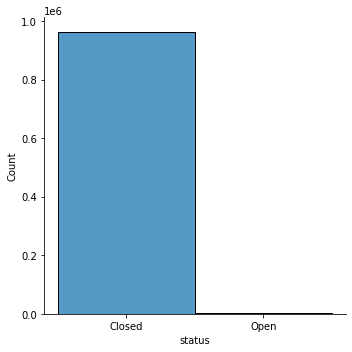

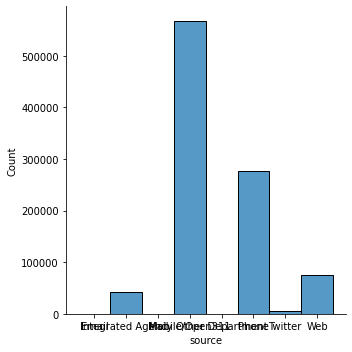

Potentially Life-Threatening
status
source


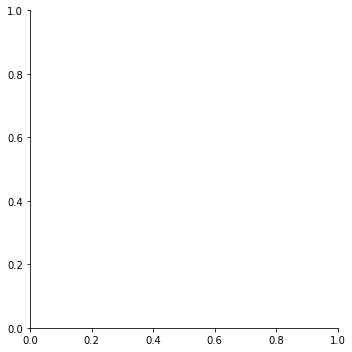

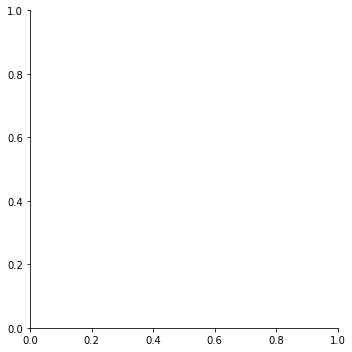

Non Life-threatening
status
source


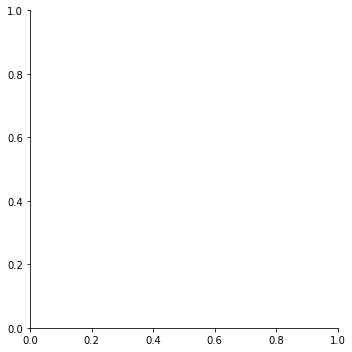

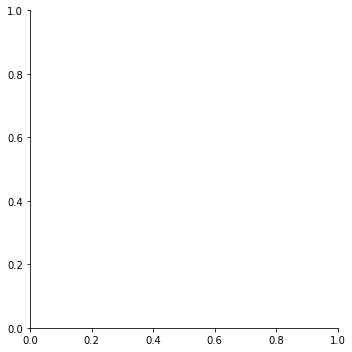

Alarm
status
source


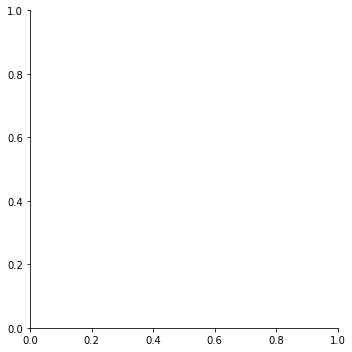

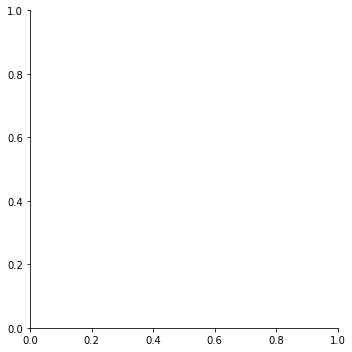

Graffiti
status
source


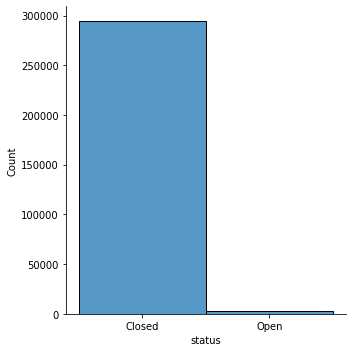

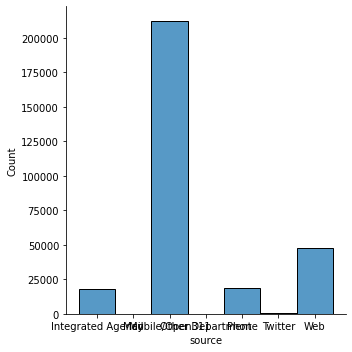

In [11]:
for event in five_frequent:
    print(event)
    print('status')
    sns.displot(data=top_five_df.loc[top_five_df['category']==event], x ='status')
    print('source')
    sns.displot(data=top_five_df.loc[top_five_df['category']==event], x ='source')
    plt.show()

### 2. Geographic distribution of 5 most frequent categories for given date

Interactive visualisation.

In [16]:
from ipyleaflet import Map, Marker, MarkerCluster

m = Map(center=(50, 0), zoom=5)

marker1 = Marker(location=(48, -2))
marker2 = Marker(location=(50, 0))
marker3 = Marker(location=(52, 2))

marker_cluster = MarkerCluster(
    markers=(marker1, marker2, marker3)
)

m.add_layer(marker_cluster);

type(m)

ipyleaflet.leaflet.Map

In [26]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [28]:
from ipyleaflet import Map, basemaps, basemap_to_tiles

m = Map(
    basemap=basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2017-04-08"),
    center=(52.204793, 360.121558),
    zoom=4,
)

m

Map(center=[52.204793, 360.121558], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

<IPython.core.display.Javascript object>